# Imports 

In [1]:
import tensorflow as tf
from tensorflow import keras

# Dados

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
X_train_full.shape # 60.000 imagens em matrizes de 28 por 28 pixels

(60000, 28, 28)

In [6]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
# Criando os dados de validação
X_val, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0 
# equivalente a X_train_full[0:5000] índice 0 ao 4999
# X_train_full[5000:] restante da lista do índice 5000 até o final
# dividimos por 255.0 para termos valores entre 0 e 1. O ponto é para que o resultado seja 
# um número flutuante
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
# Lista com o nome das classes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[100]]

'Pullover'

# Modelo

In [13]:
model = keras.models.Sequential() # modelo sequencial

2024-06-18 20:28:22.822511: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
# Adicionar camadas ao modelo
model.add(keras.layers.Flatten(input_shape=[28, 28])) # primeira camada - pré processamento
model.add(keras.layers.Dense(300, activation="relu")) # camada escondida com 300 neuronios e funca de ativacao relu
model.add(keras.layers.Dense(100, activation="relu")) # camada escondida com 100 neuronios
model.add(keras.layers.Dense(10, activation="softmax")) # camada de saída output - softmax é muito usada em problemas multiclass

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [16]:
28*28

784

In [20]:
# Parâmetros de cada camada
hidden1 = model.layers[1]
hidden1.name
weights, biases = hidden1.get_weights()

print('Pesos: {}'.format(weights))
print('Vieses: {}'.format(biases))

Pesos: [[ 0.05224398  0.00275975  0.0733337  ... -0.02816179  0.04877651
  -0.06462941]
 [-0.0232777   0.00261452 -0.00100879 ... -0.00299162  0.04204801
   0.06409729]
 [-0.01886972 -0.02702591 -0.07349086 ... -0.01432275 -0.01988712
   0.02517615]
 ...
 [ 0.05830069  0.02060168  0.03731209 ... -0.02532263  0.04861875
  -0.03349641]
 [-0.01495936 -0.00917739 -0.00808042 ... -0.02068179  0.00142291
   0.03775362]
 [-0.04104839  0.01367032 -0.00568356 ...  0.06207936 -0.04805328
   0.01242083]]
Vieses: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [22]:
# Treinamento do modelo
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd", metrics="accuracy")

In [30]:
# Treino e validaçao do modelo
history = model.fit(X_train, y_train, epochs=30,
         validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1734 - accuracy: 0.9379 - val_loss: 0.2996 - val_accuracy: 0.8924
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1697 - accuracy: 0.9397 - val_loss: 0.3024 - val_accuracy: 0.8978
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1677 - accuracy: 0.9407 - val_loss: 0.2989 - val_accuracy: 0.8964
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1651 - accuracy: 0.9417 - val_loss: 0.2993 - val_accuracy: 0.8978
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1625 - accuracy: 0.9423 - val_loss: 0.2952 - val_accuracy: 0.8974
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1607 - accuracy: 0.9428 - val_loss: 0.3039 - val_accuracy: 0.8928
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.1582 - accuracy: 0.9440 - val_loss: 0.3005 - val_accuracy:

In [25]:
# Resultados - gráficos
import pandas as pd
import numpy as np
import matplotlib as plt

AttributeError: module 'matplotlib' has no attribute 'grid'

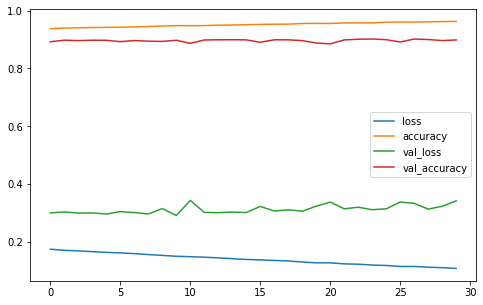

In [31]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [32]:
# Avaliando no conjunto de teste
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 100.7560 - accuracy: 0.8350


[100.75597381591797, 0.8349999785423279]

In [33]:
# Fazendo predição
X_new = X_test[0:3] #. 3 primeiras observações

In [34]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [35]:
y_pred = y_proba.argmax(axis=-1)
print(y_pred)

[9 2 1]


In [36]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [37]:
# Checando se o modelo acertou
y_new = y_test[0:3]
y_new

array([9, 2, 1], dtype=uint8)